In [1]:
# IMPORT PACKAGES
from package_bfry import *

/Users/brianfry/Documents/GitHub/Bologna/package_bfry/bfry.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2019['Area Statistica'] = income_2019['Area Statistica'].str.upper()


In [ ]:
# HOUSEHOLD SIZE
# map the household size
base_map_2019.explore(column = 'avg_household_size', cmap = 'RdBu_r', tooltip = ('zona_fiu', 'population', 'households', 'avg_household_size'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
amenities_2019.explore(column = 'gyms_per_1000', cmap = 'RdBu', tooltip = ('zona_fiu', 'population', 'gyms_per_1000'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# airbnb #
# base dataset : airbnb_agg

create_map(base_map_2019, airbnb_agg, 'household', 'airbnb', airbnb)

In [ ]:
# WIFI #
# base dataset : wifi_agg

# map the wifi per capita
create_map(base_map_2019, wifi_agg, 'population', 'hotspot', wifi, quotient = 1000)

In [ ]:
# PARTICIPATORY BUDGET #
# base dataset : budg_geo

    # process data for mapping
# aggregate the count of participative budget projects at the neighborhood level
# TO DO - resolve mixed geometry situation
#budg_agg = 
#gpd.overlay(base_map_2019, budg_geo, how='intersection', keep_geom_type=False) #.groupby('cod_zona').count()
#budg_agg
# rename and subset the data just to the count of the projects per neighborhood
#budg_agg = budg_agg.rename(columns={'Progetto':'project_count'})['project_count']
budg_geo.explore()
    # map the data
#create_map(base_map_2019, budg_agg, 'population', 'project', budg_geo, quotient = 1000)

In [ ]:
# STREET FURNITURE #
# base dataset : furniture
furniture_state_2019

In [ ]:
# explore traffic per capita at the zone level
transport_2019.explore(column = 'traffic_per_1000', cmap = 'RdBu_r')

In [ ]:
# explore bike parking per capita / household
transport_2019.explore(column = 'bike_parking_per_household', cmap = 'RdBu_r')

In [ ]:
# explore bus stops per capita
transport_2019.explore(column = 'tper_stops_per_1000', cmap = 'RdBu_r')

In [ ]:
# calculate the number of traffic coils per zone to determine the adequacy of this measurement 
base_map_2019.join(traffic_2019_geo.sjoin(base_map_2019[['geometry']]).groupby('index_right')['day_total_traffic'].count()).explore(column = 'day_total_traffic', tooltip= ('day_total_traffic'), cmap = 'RdBu_r')

In [ ]:
# MULTI VARIABLE ANALYSIS #
    # create a dataframe of variables to be analyzed together
    # can add or remove metrics for analysis as needed

In [ ]:
# plot the distribution for each variable to explore variation
for column in all_metrics:
    all_metrics[[column]].plot.hist()

In [2]:
    # calculate the z-score to give a more standard frame of rereference across metrics
#df = df.fillna(0)
df_z = (all_metrics - all_metrics.mean())/all_metrics.std()

    # create a subset of just base/socioecon related metrics
df_z_socioecon = df_z[['population', '00-14', '15-29', '30-44', '45-64', '65 e oltre',
       'avg_income', 'workers_per_cap', 'students_per_cap', 'pop_density_km2',
       'avg_household_size']]

    # create a subset of just transport related metrics
df_z_transport = df_z[['incident_per_1000', 'injured_per_1000',
       'injured_per_incident', 'mortality_per_1000', 'traffic_per_1000',
       'incident_per_traffic', 'bike_parking_per_1000', 'bike_m_per_capita',
       'percent_protected_bike', 'tper_stops_per_1000']]

    # create a subset of just amenities related metrics
df_z_amenities = df_z[['p_furn_not_good',
       'school_per_1000_child', 'furn_per_1000', 'wifi_per_1000',
       'airbnb_per_household', 'gyms_per_1000']]

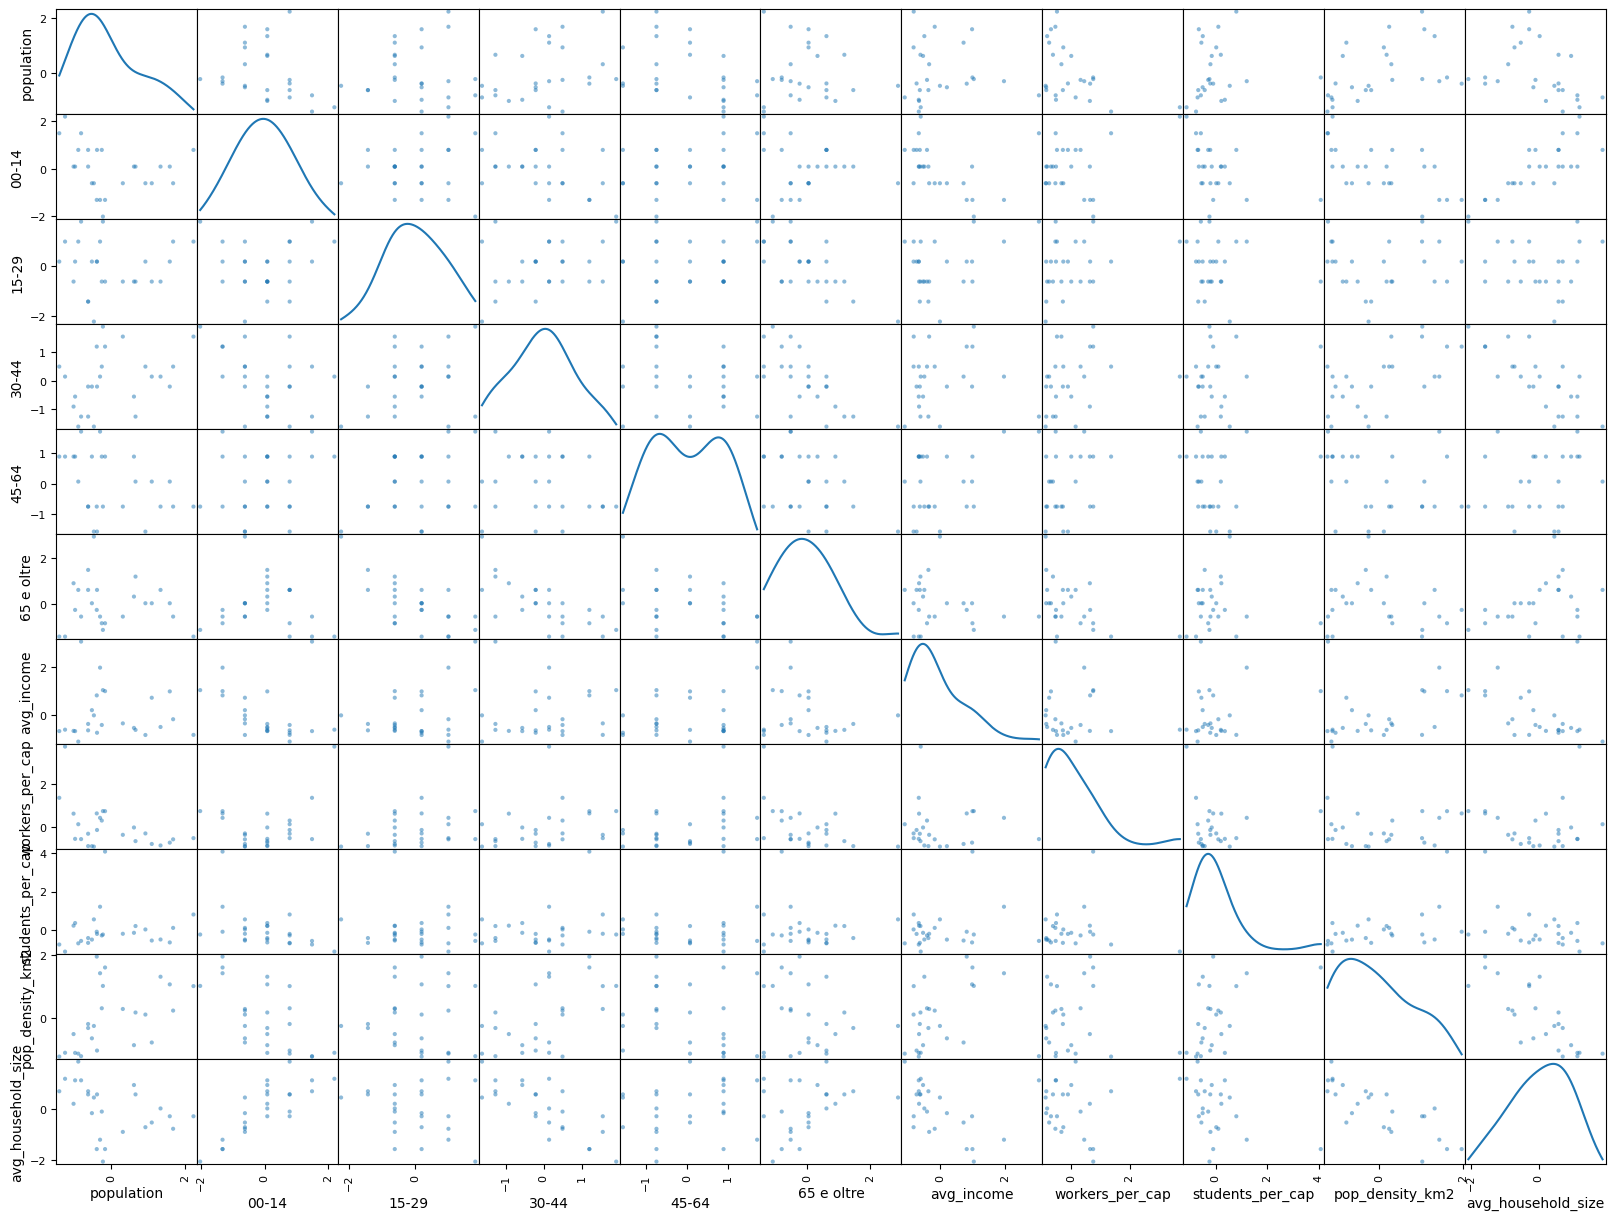

In [3]:
# scattter matrix to view distributions and correlations together
pd.plotting.scatter_matrix(df_z_socioecon, diagonal="kde",figsize=(20,15))
plt.show()
#df_z
#hinton(df_z.corr())
#df_z.corr()

Text(0, 0.5, 'SSE')

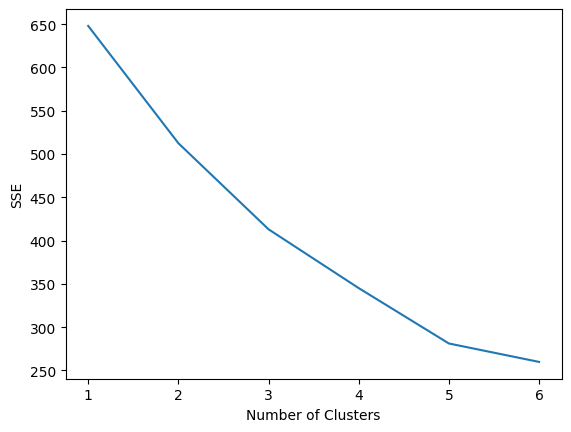

In [4]:
# test for best number of clusters
    # should use n-1 where n is the "elbow" of the plot where slope significantly changes
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_z)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
# create a cluster class instance using the df_z dataframe, and categorizing into 3 clusters, and having a geo-dataframe that has each zone polygon with its cluster
df_z_clusters_3 = km_cluster_analysis(df_z, 3, base_map_2019)

In [ ]:
# display the map of the zones showing the clusters by color and limiting the tooltip to avoid noisy visualization
df_z_clusters_3.geo.explore(column = 'Cluster ID', tooltip = ('zona_fiu','Cluster ID'))

In [ ]:
# display the average z-score for each metric across each cluster
# this tells about the character of each cluster
# for interpretation: a more negative/positive number means a cluster is characterized by being more below/above the average across all zones
df_z_clusters_3.centroids

In [60]:
# repeat the above analysis but use 4 zones
df_z_clusters_4 = km_cluster_analysis(df_z, 4, base_map_2019)
df_z_clusters_4.geo.explore(column = 'Cluster ID', tooltip = ('zona_fiu','Cluster ID'))

In [61]:
# display the centroids for the 4-cluster analysis of all metrics
df_z_clusters_4.centroids

,population,00-14,15-29,30-44,45-64,65 e oltre,avg_income,workers_per_cap,students_per_cap,pop_density_km2,...,bike_parking_per_1000,bike_m_per_capita,percent_protected_bike,tper_stops_per_1000,p_furn_not_good,school_per_1000_child,furn_per_1000,wifi_per_1000,airbnb_per_household,gyms_per_1000
0,-0.553268,-0.266927,-1.831095,-1.442078,-1.162010,2.190957,-0.194385,-0.879255,0.066013,-0.292884,...,-0.509835,-0.437567,1.240676,-0.158664,-0.275320,0.510936,0.068741,-0.617644,-0.670303,2.178197
1,-0.579081,0.669659,0.059416,-0.474830,0.474624,-0.001907,-0.285047,0.264752,-0.345882,-0.723054,...,-0.510794,0.570658,0.135195,0.480078,-0.177157,-0.431634,0.633711,-0.391936,-0.465401,-0.063132
2,1.308796,-0.216753,0.078707,0.592910,-0.635949,-0.240262,-0.141386,-0.571126,-0.134809,0.462358,...,-0.233272,-0.509650,-0.099105,-0.548905,0.029154,-0.055026,-0.527136,-0.224673,-0.230096,-0.367889
3,-0.276516,-1.496196,0.599562,1.107938,0.270045,-0.669300,1.199759,0.644842,1.240556,1.506479,...,2.195527,-0.601303,-0.852489,-0.400318,0.618112,1.135728,-1.013016,1.877807,2.134022,-0.255896


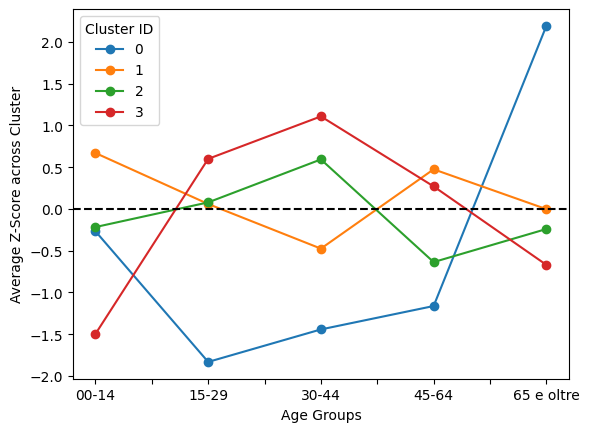

In [35]:
# Explore age caharacteristics of the clusters
df_z_clusters_4.centroids[['00-14', '15-29', '30-44', '45-64', '65 e oltre']].T.plot(marker ='o')
plt.xlabel('Age Groups') 
plt.ylabel('Average Z-Score across Cluster') 
plt.legend(title = 'Cluster ID')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.show()

In [91]:
# create visualizations to compare zones to their clsuter-mates and the average for the cluster
# extract the cluster ID as its own column and rename
cleaned_centroids = df_z_clusters_4.centroids.reset_index().rename(columns={'index':'Cluster ID'})
# set the cluster ID as a string to match the zone-level data
cleaned_centroids['Cluster ID'] = cleaned_centroids['Cluster ID'].astype(str)
# append the cluster centroids to the zone-level standardized z-score data
plot_data = pd.concat([df_z.join(df_z_clusters_4.geo[['Cluster ID']]), cleaned_centroids], axis=0)

,population,00-14,15-29,30-44,45-64,65 e oltre,avg_income,workers_per_cap,students_per_cap,pop_density_km2,...,bike_m_per_capita,percent_protected_bike,tper_stops_per_1000,p_furn_not_good,school_per_1000_child,furn_per_1000,wifi_per_1000,airbnb_per_household,gyms_per_1000,Cluster ID
BARCA,0.655808,0.084293,-0.615767,-1.266214,0.065465,1.189867,-0.618556,-0.637872,0.205766,0.170918,...,-0.048132,0.397973,-0.625630,0.093859,-0.238343,1.049831,-0.402681,-0.654917,-0.075580,1
BERTALIA - NOCE,-0.984990,0.084293,0.194453,-0.562762,0.883782,-0.240262,-0.670644,-0.533329,0.361961,-1.122452,...,1.101885,1.213492,0.730020,-1.153966,0.013632,1.147519,-0.692093,-0.588943,-0.204933,1
BEVERARA,-1.027312,0.084293,-0.615767,-0.914488,0.883782,0.903841,-0.661626,0.633522,0.225290,-0.519766,...,0.709003,0.506709,0.571394,-1.823655,0.814947,0.631375,0.163291,-0.514063,1.982919,1
BIRRA - BARGELLINO - LAVINO,-1.415085,1.489171,0.194453,0.492417,0.883782,-1.384365,-0.670178,1.365107,-0.755037,-1.241029,...,2.387949,-0.743753,1.338202,0.325383,-1.233227,-0.587231,-0.692093,-0.271201,-0.295084,1
BOLOGNINA,2.230048,0.786732,1.004672,1.547595,-0.752852,-1.384365,-0.827065,-0.499591,0.805882,1.016593,...,-0.554282,0.615445,-0.809330,-0.534067,-0.460965,-0.901571,-0.079147,0.057549,-0.449720,2
BORGO PANIGALE,-0.389948,0.786732,0.194453,-0.211036,-1.571169,0.617816,-0.738437,-0.122478,-0.204245,-1.047992,...,0.232946,0.180501,-0.558072,1.670861,-0.338556,0.491709,-0.341060,-0.573696,-0.395807,1
CASTELDEBOLE - PONTELUNGO,-0.631823,0.786732,-1.425986,-0.211036,-0.752852,0.617816,-0.638303,-0.296052,-0.669746,-0.197416,...,0.731572,-0.145706,-0.433485,1.183403,-0.229937,1.306059,-0.357193,-0.543370,1.382910,1
CIRENAICA - MASSARENTI - SCANDELLARA,1.677207,-0.618147,1.004672,0.492417,-0.752852,-0.526287,-0.177126,-0.554637,0.109172,0.232307,...,-0.431402,0.615445,-0.327404,-0.993171,0.744183,-0.997675,-0.338097,-0.083777,-0.431056,2
CORTICELLA - DOZZA,0.613365,0.084293,-0.615767,-0.562762,0.883782,0.331790,-0.538013,-0.007502,-0.146700,-0.875262,...,0.617051,0.017398,0.050788,-0.157798,0.233541,1.263621,-0.439816,-0.566988,-0.039586,1
CROCE DEL BIACCO - ROVERI,-1.257974,2.191611,1.004672,0.140690,0.883782,-1.384365,-0.610471,3.733878,-1.122916,-1.118951,...,2.567045,-2.048583,2.006071,-2.173236,-1.663267,0.054484,-0.692093,-0.434790,-0.769351,1


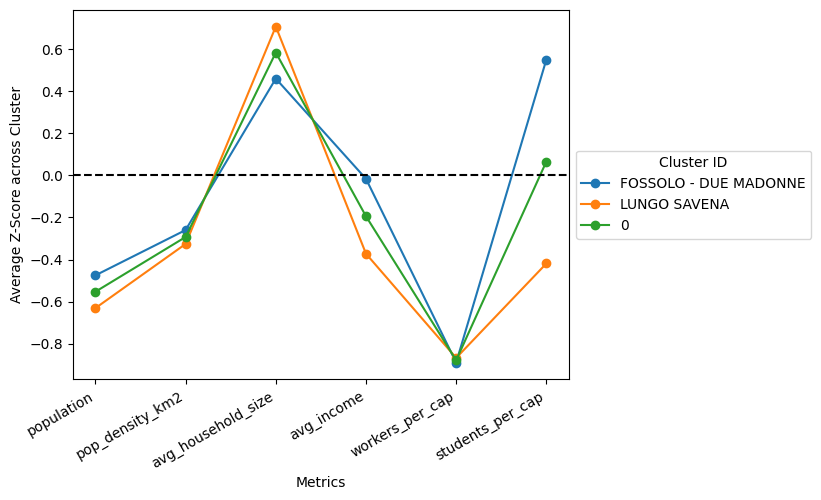

In [96]:
# Plot the socioeconomic metrics profile for the zones in the 0 cluster
# subset to the desired cluster - in this case 0
plot_data_id_0 = plot_data.loc[plot_data['Cluster ID'] == '0']
# subset to the metrics to display
ax = plot_data_id_0[['population', 'pop_density_km2', 'avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']].T.plot(marker ='o')
# add axis labels
plt.xlabel('Metrics') 
plt.ylabel('Z-Score') 
# format the legend
plt.legend(title = 'Zone Name', loc='center left', bbox_to_anchor=(1, 0.5))
# add a reference line to allow comparison to average
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
# format the x axis labels
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# display the graph
plt.show()

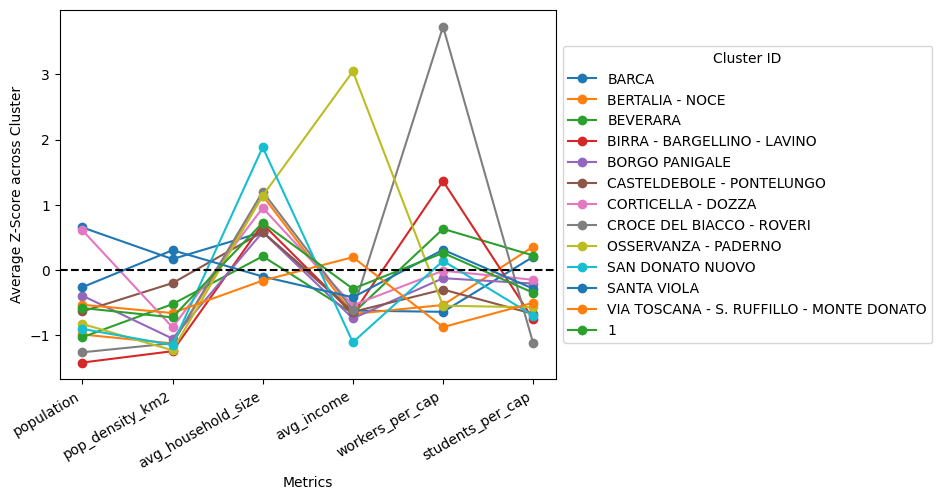

In [95]:
plot_data_id_1 = plot_data.loc[plot_data['Cluster ID'] == '1']
ax = plot_data_id_1[['population', 'pop_density_km2', 'avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']].T.plot(marker ='o')
plt.xlabel('Metrics') 
plt.ylabel('Z-Score') 
plt.legend(title = 'Zone Name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

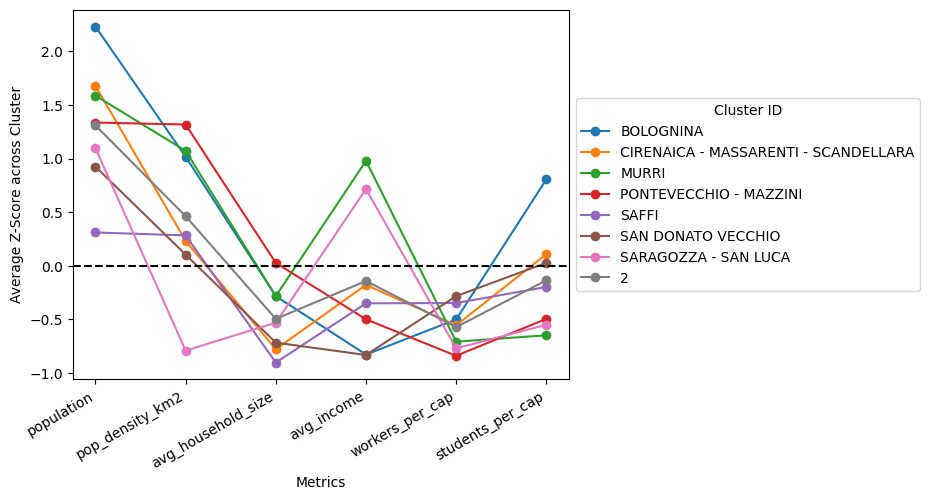

In [97]:
plot_data_id_2 = plot_data.loc[plot_data['Cluster ID'] == '2']
ax = plot_data_id_2[['population', 'pop_density_km2', 'avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']].T.plot(marker ='o')
plt.xlabel('Metrics') 
plt.ylabel('Z-Score') 
plt.legend(title = 'Zone Name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

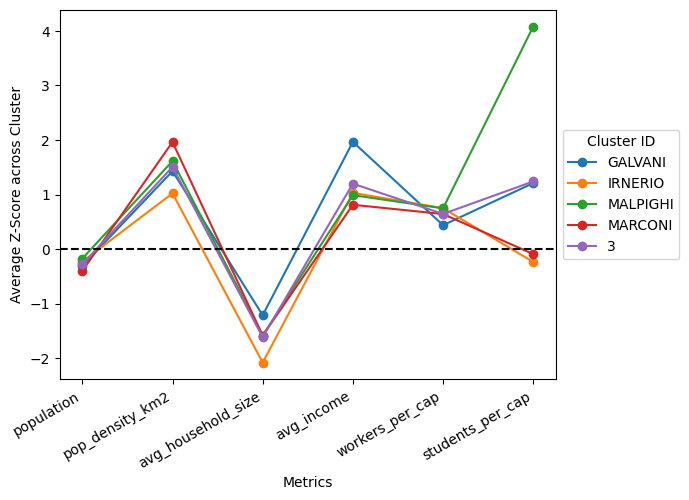

In [98]:
plot_data_id_3 = plot_data.loc[plot_data['Cluster ID'] == '3']
ax = plot_data_id_3[['population', 'pop_density_km2', 'avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']].T.plot(marker ='o')
plt.xlabel('Metrics') 
plt.ylabel('Z-Score') 
plt.legend(title = 'Zone Name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

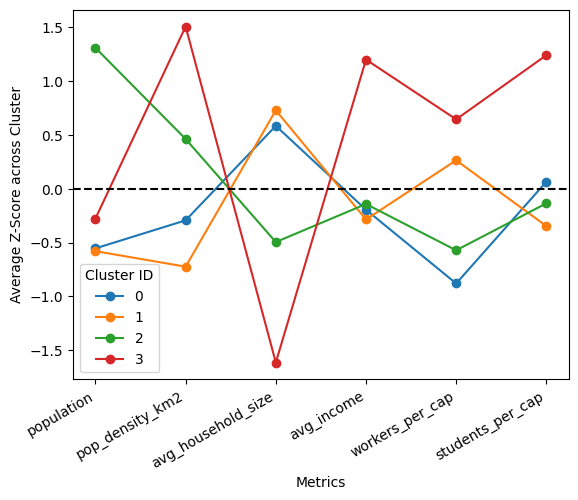

In [34]:
# Explore other socioecon caharacteristics of the clusters
ax = df_z_clusters_4.centroids[['population', 'pop_density_km2', 'avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']].T.plot(marker ='o')
plt.xlabel('Metrics') 
plt.ylabel('Average Z-Score across Cluster') 
plt.legend(title = 'Cluster ID')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

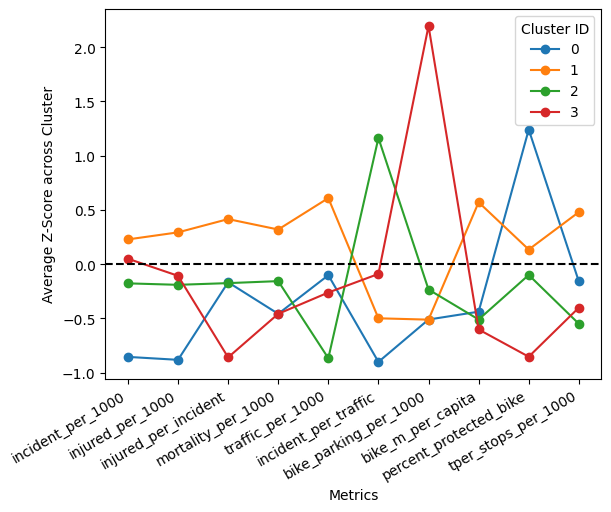

In [73]:
# Explore transport caharacteristics of the clusters
#import mpl_interactions.ipyplot as iplt
plt.ion()
ax = plt.plot(df_z_clusters_4.centroids[['incident_per_1000', 'injured_per_1000',
       'injured_per_incident', 'mortality_per_1000', 'traffic_per_1000',
       'incident_per_traffic', 'bike_parking_per_1000', 'bike_m_per_capita',
       'percent_protected_bike', 'tper_stops_per_1000']].T, marker ='o')
plt.xlabel('Metrics') 
plt.ylabel('Average Z-Score across Cluster') 
plt.legend(df_z_clusters_4.centroids.index, title = 'Cluster ID')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.xticks(rotation=30, horizontalalignment='right')
plt.pause(0.01)
plt.show()

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_socio_clusters_3 = km_cluster_analysis(df_z_socioecon, 3, base_map_2019)
df_socio_clusters_3.geo.explore(column = 'Cluster ID', tooltip = ('zona_fiu','Cluster ID'))

# interesting result: zone Beverara is the only zone that has changed. indicates that this zone is more similar to zone 2 socioeconomically speaking but more similar to 0 when considering the transportation metrics

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_socio_clusters_4 = km_cluster_analysis(df_z_socioecon, 4, base_map_2019)
df_socio_clusters_4.geo.explore(column = 'Cluster ID', tooltip = ('zona_fiu','Cluster ID'))

# interesting result: zone Beverara is the only zone that has changed. indicates that this zone is more similar to zone 2 socioeconomically speaking but more similar to 0 when considering the transportation metrics

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_socio_clusters_4.centroids

In [ ]:
# perform cluster analysis on df_z_transport (transport metrics only) and display results
# screeplot (the "elbow" graph) analysis of this dataset yielded a result that suggested 2 clusters was most meaningful 
df_transport_clusters_3 = km_cluster_analysis(df_z_transport, 3, base_map_2019)
df_transport_clusters_3.geo.explore(column = 'Cluster ID', tooltip = ('zona_fiu','Cluster ID'))
# should try to add more transportation related metrics and determine if this creates more meaningful insight

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_transport_clusters_3.centroids

In [ ]:
    # principal compoenents analysis
# set the resulting categories of the cluster analysis as dependent variable 
y = df_socio_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']]

# define the principal component analysis from the standardized z-score data
pca = PCA().fit(df_z)

# output the summary statistics for each principal component
#pca_summary(pca, df_z)

# display the coefficients for the first principal component
#pca.components_[0]

# display the screeplot to determine the number of principal components to retain
# should use n-1 where n is where the "elbow" of the plot occurs - where the slope significantly changes
#screeplot(pca, df_z) 
    # based on result - retain the first 3 principal components

# display a scatterplot of the data to show the clusters in comparison to the first two principal components
pca_scatter(pca, df_z, y)
# the PCA analysis and the cluster analysis appear compatible

In [ ]:
# repeat the analysis with the socioeconomic metrics
y_socioecon = df_socio_clusters_4.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_socioecon = PCA().fit(df_z_socioecon)
pca_scatter(pca_socioecon, df_z_socioecon, y_socioecon)

In [ ]:
# repeat the analysis with the transport metrics
y_transport = df_transport_clusters_3.geo.reset_index()[['zona_fiu','Cluster ID']]
pca_transport = PCA().fit(df_z_transport)
pca_scatter(pca_transport, df_z_transport, y_transport)
# conclusion as of 19/7 - the analysis of the combined dataset is still being driven heavily by the summary statistics 
# removing the summary stats leads to a weak grouping from the transport related metrics into two clusters - interior and exterior
# continue adding metrics

In [ ]:
# hierarchical clustering - provides ability to see further granularity and inter-group similarities / differences compared to k-means

# average linkage - compares using average distance between members of each cluster
linkage_matrix = linkage(df_z, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# repeat the hierarchical clustering from above but only with the transport related metrics
linkage_matrix = linkage(df_z_transport, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z_transport.index)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()